# E.D.A of 2022 Layofs
- Dataset: https://www.kaggle.com/datasets/swaptr/layoffs-2022

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r'../data/'
file = path + "layoffs_2022_dataset.zip"

df = pd.read_csv(file)

# Worldwide

In [3]:
df.shape

(1586, 9)

In [4]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,IPO,United States,108.0
1,Asana,SF Bay Area,Other,180.0,0.09,2022-11-15,IPO,United States,453.0
2,Protocol,SF Bay Area,Media,60.0,1.00,2022-11-15,Acquired,United States,NaN
3,Nirvana Money,Miami,Finance,NaN,1.00,2022-11-15,Unknown,United States,NaN
4,Sema4,Stamford,Healthcare,500.0,NaN,2022-11-14,IPO,United States,791.0


In [5]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         447
percentage_laid_off    528
date                     0
stage                    4
country                  0
funds_raised           105
dtype: int64

In [6]:
df = df.drop(['funds_raised','percentage_laid_off', 'stage'], axis=1)
df.total_laid_off = df.total_laid_off.fillna(1) # Assume there must be atleast 1 reported layoff in any company in this dataset
df.industry = df.industry.fillna('Unknown')
df.total_laid_off = df.total_laid_off.astype(int) # layoffs should be whole numbers not floats

In [7]:
df.shape

(1586, 6)

In [8]:
df.isna().sum()

company           0
location          0
industry          0
total_laid_off    0
date              0
country           0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_laid_off,1586.0,143.824086,505.61552,1.0,1.0,40.0,100.0,11000.0


<AxesSubplot: >

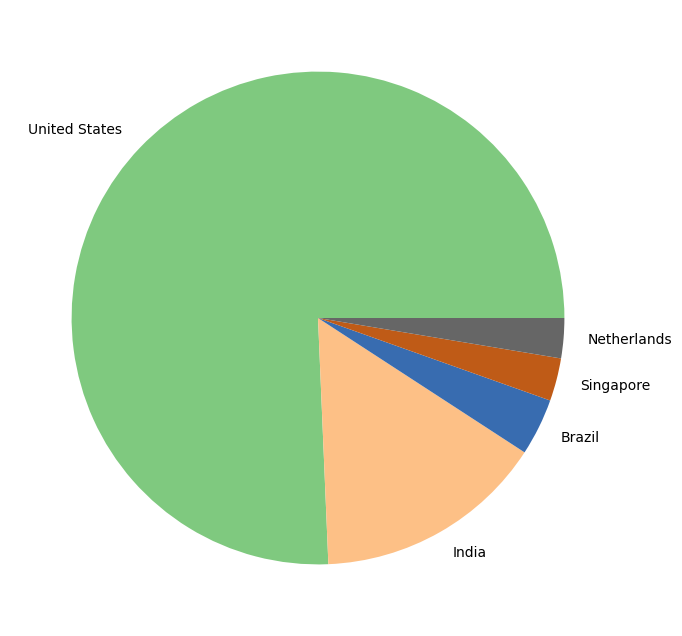

In [10]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Accent')

<AxesSubplot: >

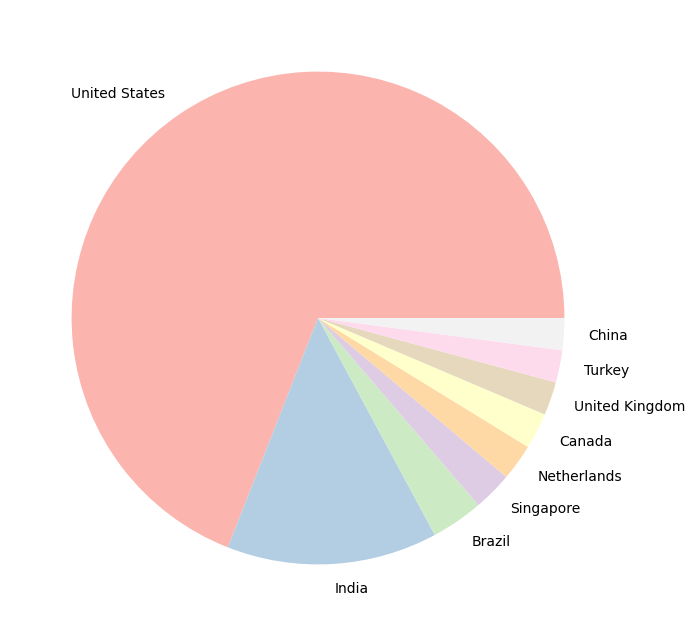

In [11]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).iloc[0:9].plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Pastel1')

<AxesSubplot: >

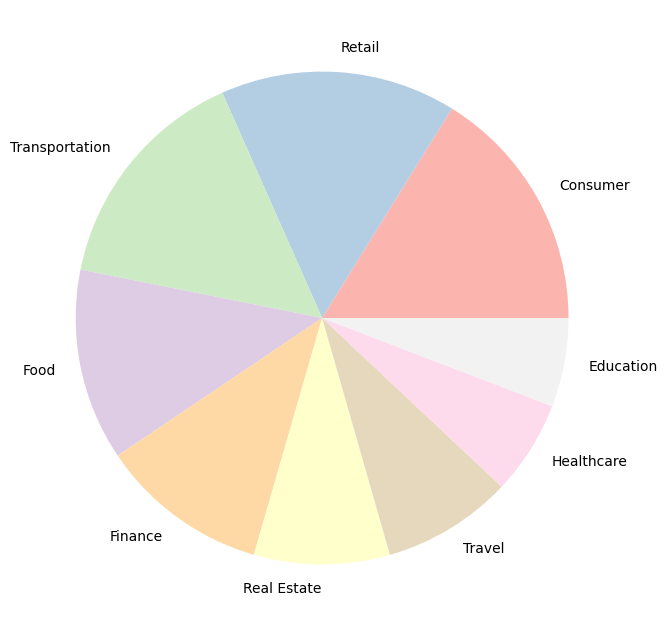

In [12]:
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).iloc[0:9].plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Pastel1')

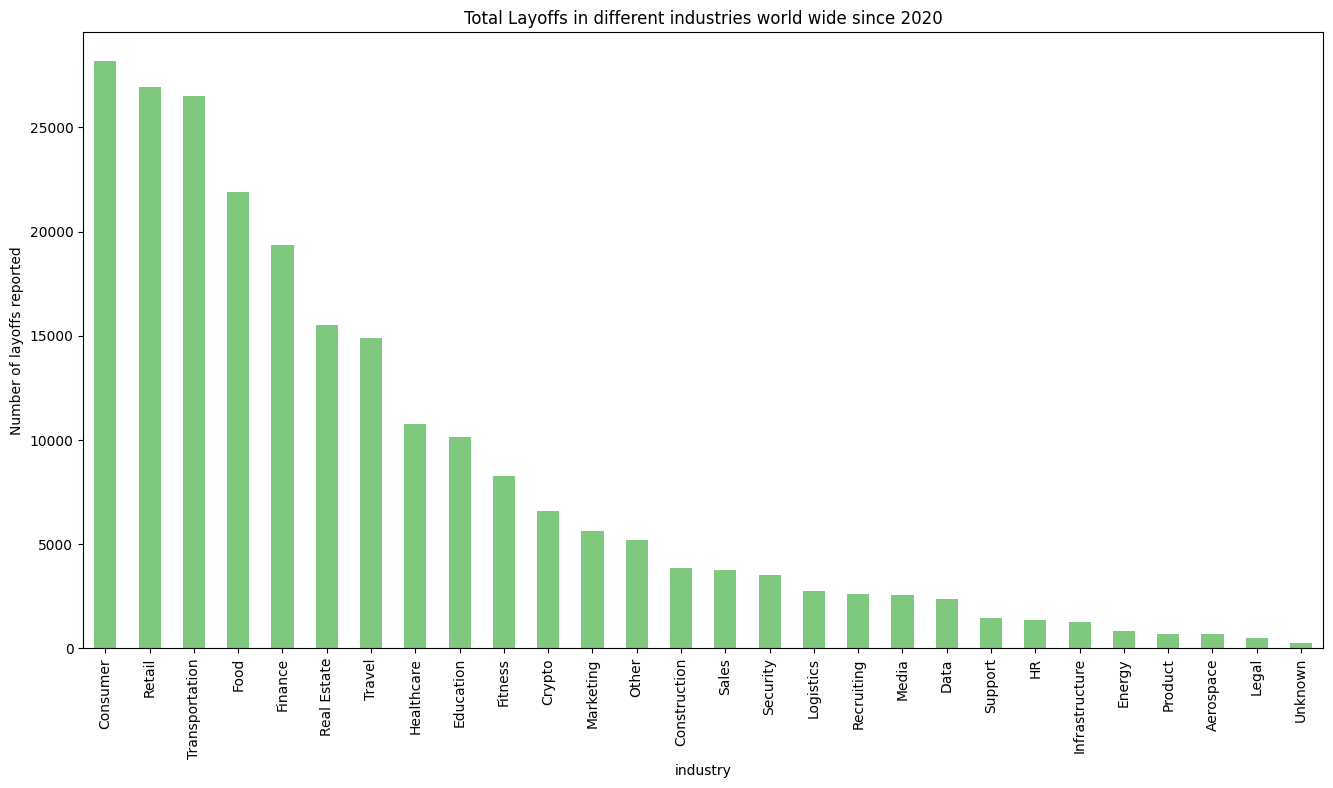

In [13]:
plt.figure(figsize=(10, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

# In Denmark

In [14]:
print('Tottal Layofs in denmark since 2020: ', df.groupby('country')['total_laid_off'].sum().loc['Denmark'])

Tottal Layofs in denmark since 2020:  240


In [15]:
df_denmark = df[df['country']=="Denmark"]
df_minus_denmark = df[df['country']!="Denmark"]

<AxesSubplot: title={'center': 'Total Layoffs in different industries in Denmark since 2020'}, xlabel='industry', ylabel='Number of layoffs reported'>

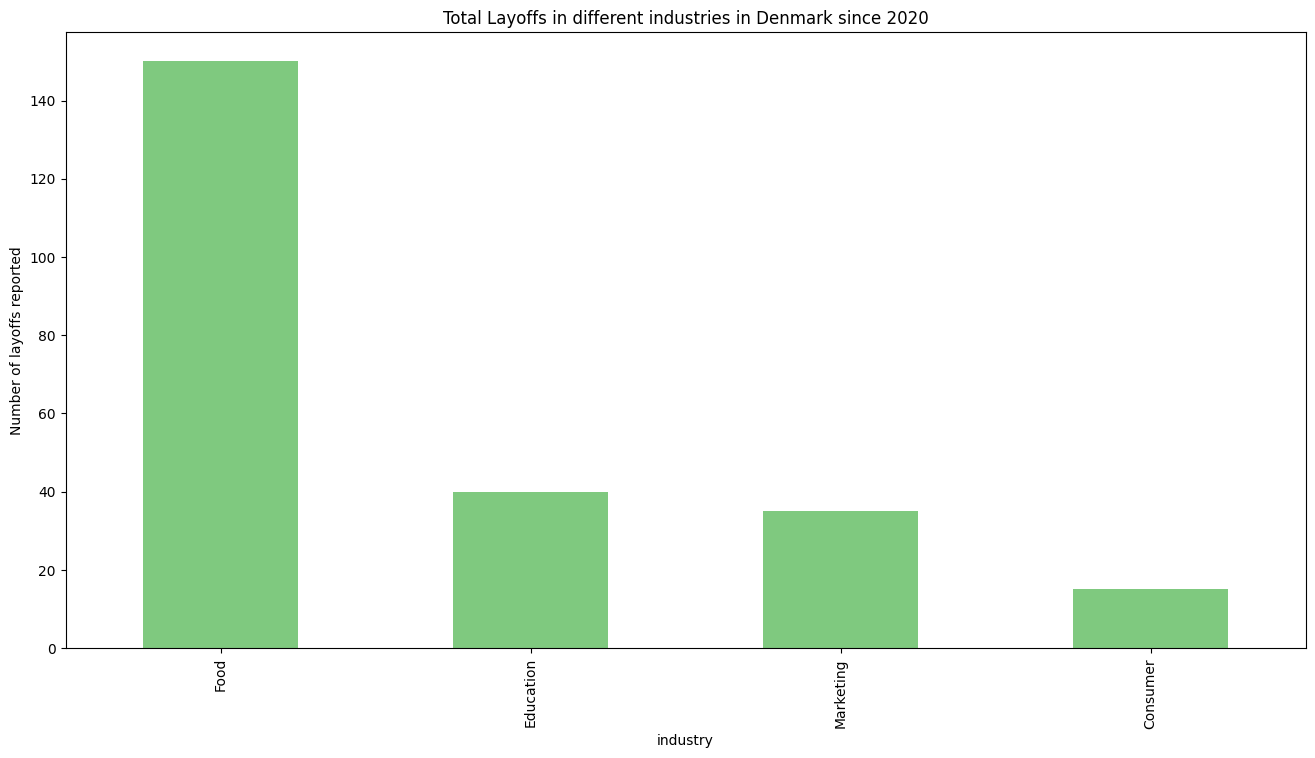

In [16]:
plt.title("Total Layoffs in different industries in Denmark since 2020")
plt.ylabel("Number of layoffs reported")
df_denmark.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

In [17]:
df_year = df_denmark.set_index('date')
denmark_most_layoffs = df_year.sort_values(by='total_laid_off', ascending=False)
denmark_most_layoffs

,company,location,industry,total_laid_off,country
date,,,,,
2022-09-07,Simple Feast,Copenhagen,Food,150,Denmark
2020-04-17,Labster,Copenhagen,Education,40,Denmark
2022-10-11,Linkfire,Copenhagen,Marketing,35,Denmark
2022-06-15,Airtame,Copenhagen,Consumer,15,Denmark


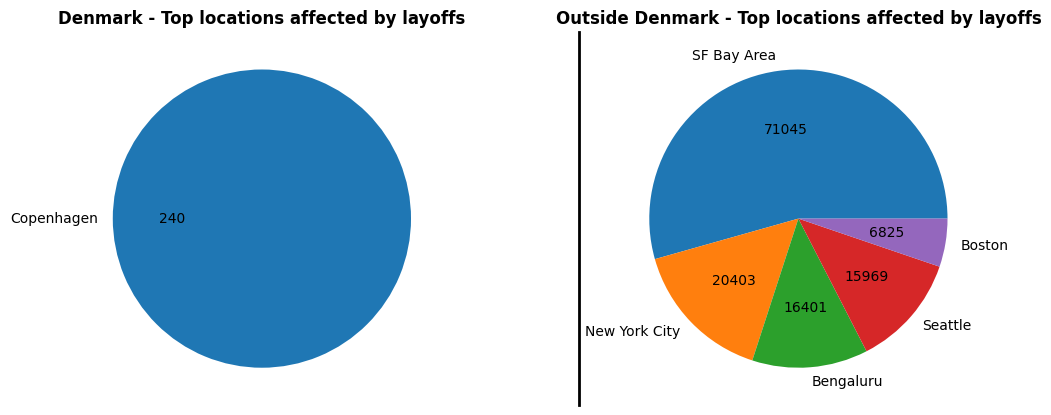

In [18]:
# isolate data to be plotted
d1 = df_denmark.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_denmark.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Denmark - Top locations affected by layoffs", fontweight='bold')
ax2.set_title("Outside Denmark - Top locations affected by layoffs", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

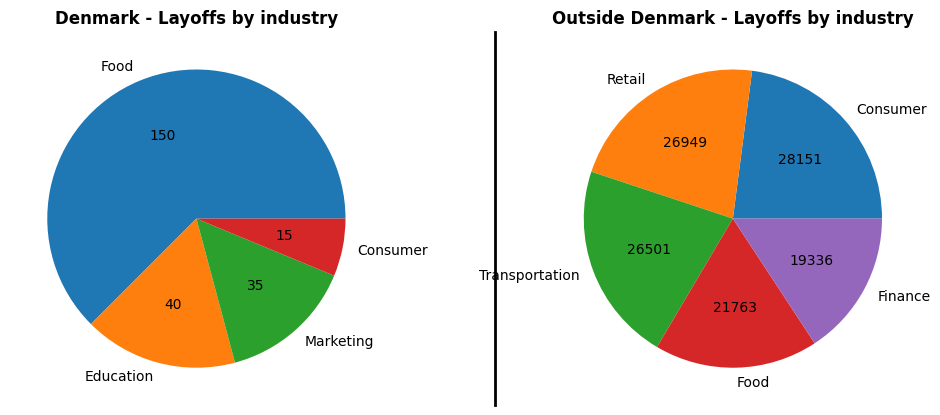

In [19]:
# isolate data to be plotted
d1 = df_denmark.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_denmark.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Denmark - Layoffs by industry", fontweight='bold')
ax2.set_title("Outside Denmark - Layoffs by industry", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

# Scandinavia

In [20]:
df_nordics = df[(df['country']=="Denmark") | (df['country']=="Norway") | (df['country']=="Sweden") | (df['country']=="Finland")]
df_minus_nordics = df[(df['country']!="Denmark") | (df['country']!="Norway") | (df['country']!="Sweden") | (df['country']!="Finland")]

In [21]:
df_nordics.head()

,company,location,industry,total_laid_off,date,country
34,Spotify,Stockholm,Media,1,2022-11-09,Sweden
74,Signicat,Trondheim,Security,1,2022-11-02,Norway
78,Oda,Oslo,Food,70,2022-11-01,Sweden
79,Oda,Oslo,Food,70,2022-11-01,Norway
84,Kry,Stockholm,Healthcare,300,2022-10-31,Sweden


<AxesSubplot: title={'center': 'Total Layoffs in different industries in the Nordics since 2020'}, xlabel='industry', ylabel='Number of layoffs reported'>

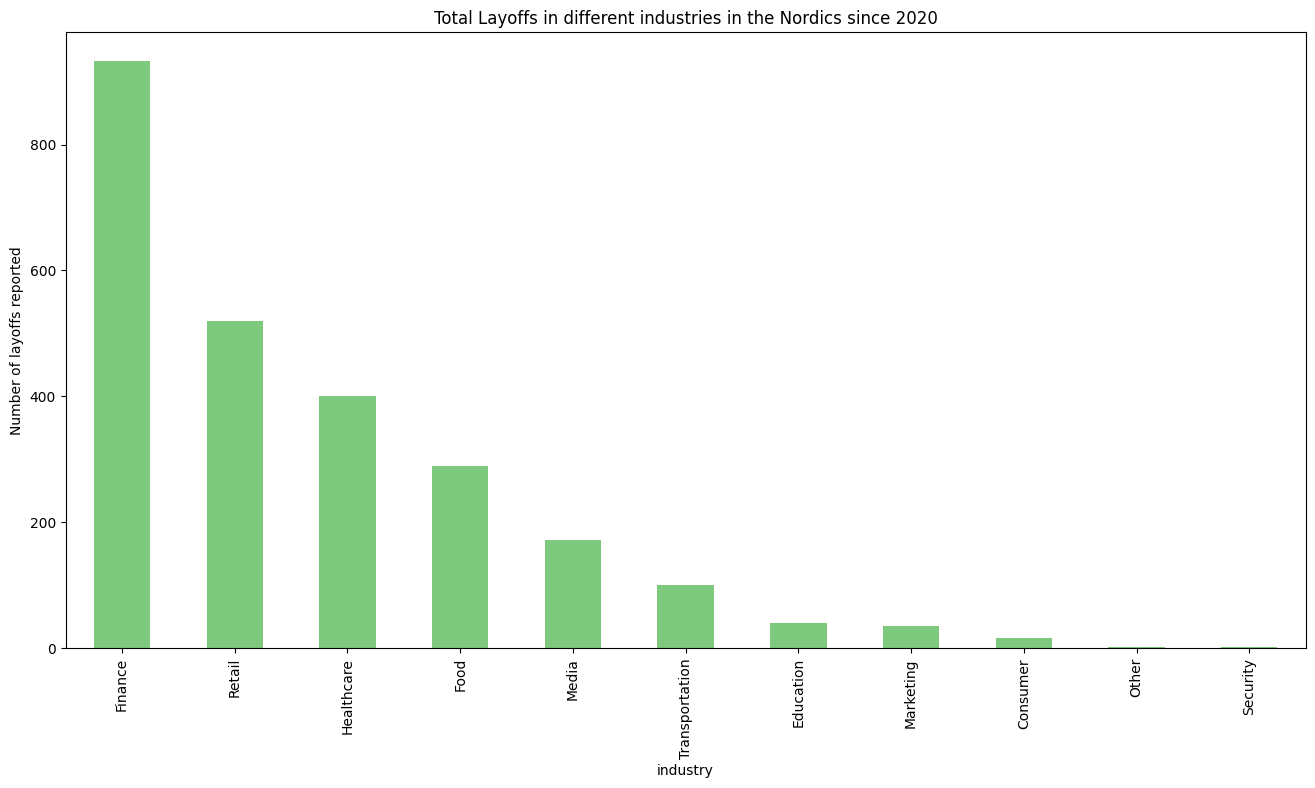

In [22]:
plt.title("Total Layoffs in different industries in the Nordics since 2020")
plt.ylabel("Number of layoffs reported")
df_nordics.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

In [23]:
df_nordics = df_nordics.reset_index()
df_nordics['date'] = pd.to_datetime(df_nordics['date'])
df_nordics_years = df_nordics.groupby([df_nordics.country, df_nordics.date.dt.year]).sum()

In [24]:
df_nordics_years = df_nordics_years.reset_index()
df_nordics_years

,country,date,index,total_laid_off
0,Denmark,2020,1275,40
1,Denmark,2022,1087,200
2,Finland,2022,681,250
3,Norway,2022,576,72
4,Sweden,2020,1422,100
5,Sweden,2022,6625,1845


<AxesSubplot: title={'center': 'Yearly layoffs in various industries Nordics'}, xlabel='country', ylabel='total_laid_off'>

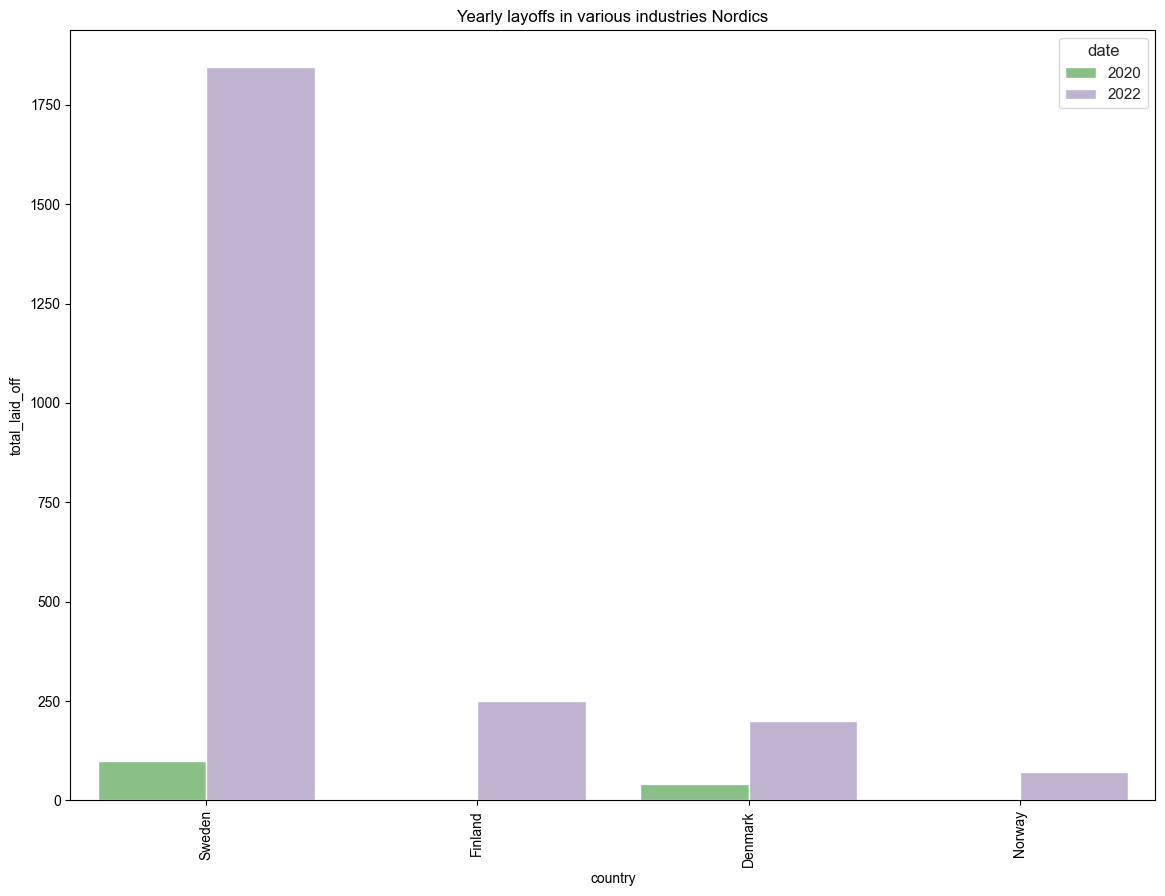

In [25]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries Nordics")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_nordics_years.sort_values(by=['total_laid_off','date'], ascending=False), x="country", y="total_laid_off", hue="date")

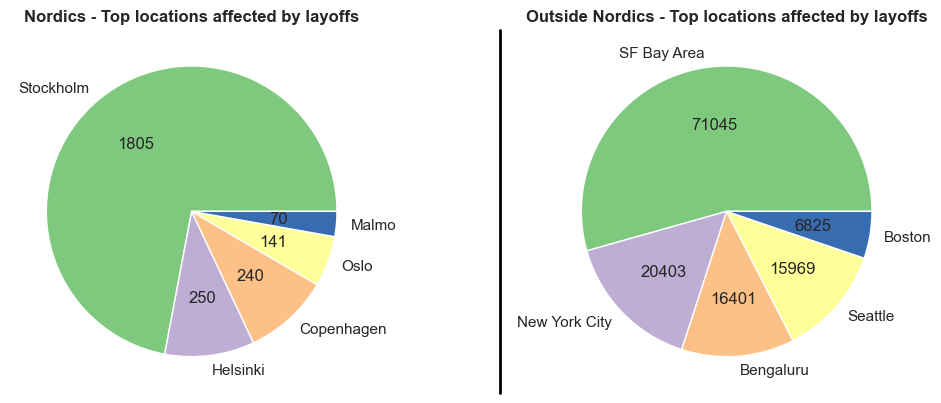

In [26]:
# isolate data to be plotted
d1 = df_nordics.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_nordics.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Nordics - Top locations affected by layoffs", fontweight='bold')
ax2.set_title("Outside Nordics - Top locations affected by layoffs", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

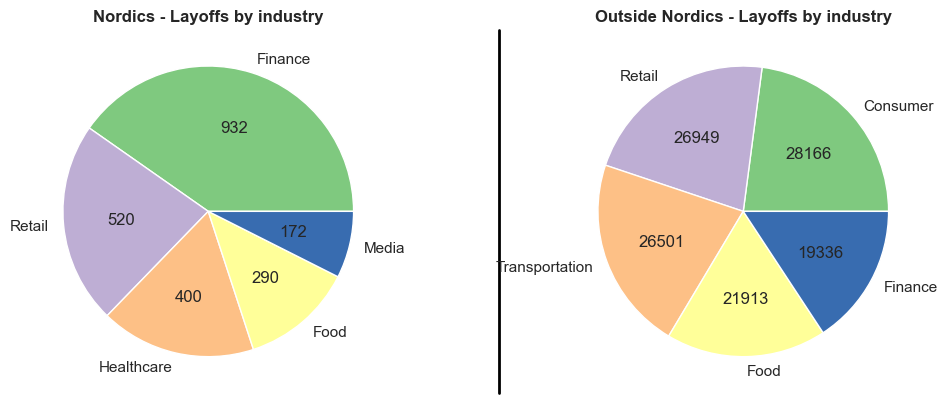

In [27]:
# isolate data to be plotted
d1 = df_nordics.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_nordics.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Nordics - Layoffs by industry", fontweight='bold')
ax2.set_title("Outside Nordics - Layoffs by industry", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

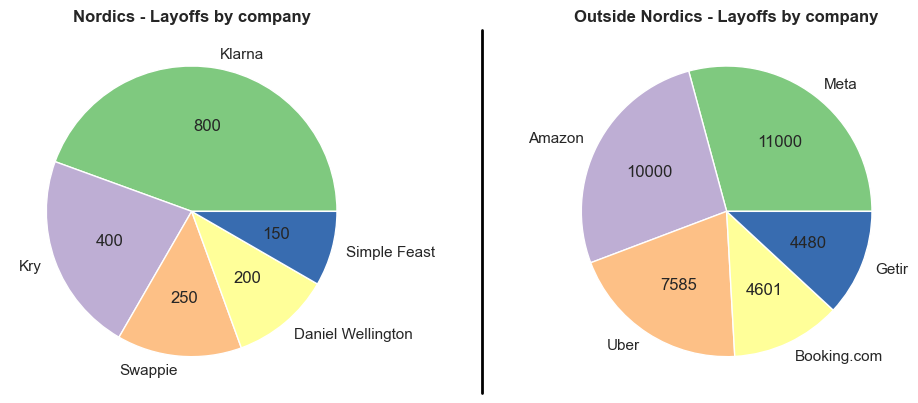

In [28]:
# isolate data to be plotted
d1 = df_nordics.groupby("company")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_nordics.groupby("company")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Nordics - Layoffs by company", fontweight='bold')
ax2.set_title("Outside Nordics - Layoffs by company", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

# Denmark VS Scandinavia

In [29]:
df_nordics_minus_dk = df[(df['country']=="Norway") | (df['country']=="Sweden") | (df['country']=="Finland")]

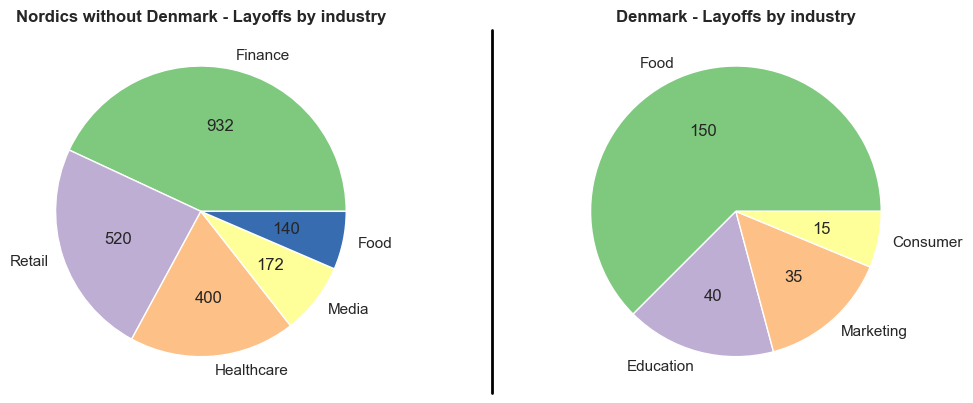

In [30]:
# isolate data to be plotted
d1 = df_nordics_minus_dk.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_denmark.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Nordics without Denmark - Layoffs by industry", fontweight='bold')
ax2.set_title("Denmark - Layoffs by industry", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)